In [29]:
import pandas as pd
from transformers import AutoModelForSequenceClassification, AutoTokenizer, AutoConfig
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np


# Load the model and tokenizer
MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
config = AutoConfig.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL, output_hidden_states=True)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [30]:
# Load your CSV data
csv_file_path = r"C:\Users\alyas\Desktop\TER\test_sentiment_analysis\all.csv"
df = pd.read_csv(csv_file_path)

In [31]:
# Initialize lists to store hidden states and labels
hidden_states_list = []
labels = []

# Iterate over each tweet in the dataframe
for index, row in df.iterrows():
    # Tokenize and classify
    encoded_input = tokenizer(row["Text"], return_tensors='pt')
    output = model(**encoded_input)
    
    # Extract hidden states for the tweet
    hidden_states = output.hidden_states[-1][0, 0, :].detach().numpy()
    
    # Append to lists
    hidden_states_list.append(hidden_states)
    labels.append(row["Sentiment"])

# Convert lists to numpy arrays
hidden_states_array = np.array(hidden_states_list)


# Perform t-SNE on the hidden states
tsne = TSNE(n_components=2, perplexity= 2300, random_state=42)
# Perform t-SNE on the hidden states
print("Number of samples:", hidden_states_array.shape[0])
print("Perplexity value:", tsne.perplexity)
embedded_states = tsne.fit_transform(hidden_states_array)
embedded_states = tsne.fit_transform(hidden_states_array)


Number of samples: 1000
Perplexity value: 100


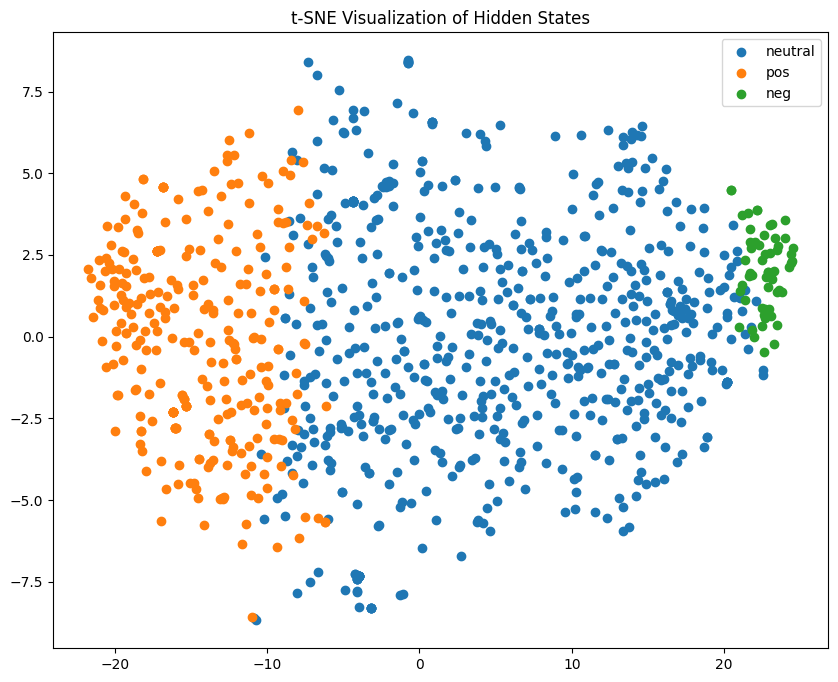

In [32]:

# Plot the embedded states with different colors for each sentiment
plt.figure(figsize=(10, 8))
for sentiment in df["Sentiment"].unique():
    indices = df[df["Sentiment"] == sentiment].index
    plt.scatter(embedded_states[indices, 0], embedded_states[indices, 1], label=sentiment)

plt.title('t-SNE Visualization of Hidden States')
plt.legend()
plt.show()